<center>
<figure>
    <img src="https://austinrochford.com/resources/img/kayak_sunrise.png" width="60%" alt="Sunrise over back bay in a kayak">
    <figcaption>Sunrise over <a href="https://maps.app.goo.gl/rnDzaFEQLJ1mrFNk9">Jenkins Sound</a>, New Jersey</figcaption>
</figure>
</center>

Just over a year ago, I moved to the [beach](https://en.wikipedia.org/wiki/Cape_May_Court_House,_New_Jersey), partly to be able to indulge in my passion of sea kayaking more frequently.  As a result of this move, I have become much more aware of the tidal rythym of both the local Atlantic Ocean and [Delaware Bay](https://en.wikipedia.org/wiki/Delaware_Bay) coasts.

While there are many websites that will provide detailed tide tables, and I have aqcuired a nice, decorative [tide clock](https://en.wikipedia.org/wiki/Tide_clock) featuring a landscape of our [local lighthouse](https://en.wikipedia.org/wiki/Cape_May_Lighthouse), I found myself wanting a digital display that cycled through the tidal status at several locations.

<center>
<figure>
    <img src="https://images.squarespace-cdn.com/content/v1/54a17af0e4b0f0443677e561/1605620839653-J9N5X4D3I9XZFUFWJDV0/CMNV.jpg?format=2500w" alt="Tide clock showing the Cape May Point lighthouse" width="60%">
    <figcaption>Cape May Point Lighthouse tide clock from <a href="https://www.tidepieces.com/shop/cape-may-lighthouse-new-jersey">Tidepieces</a></figcaption>
</figure>
</center>

After a bit of searching, I found the relatively inexpensive [Ulanzi TC001 Smart Pixel Clock 2882
](https://www.ulanzi.com/products/ulanzi-pixel-smart-clock-2882?srsltid=AfmBOorD9ZhQLOUcCRKgU15xK_4bjLfW_N0RdtBl8H-NloLi4KvFQz-V) and the corresponding open source firmware [AWTRIX 3](https://blueforcer.github.io/awtrix3/#/).  In the process of writing software to turn this device into a digital tide clock, I stumbled upon the fun little math problem that is the subject of this post.

<center>
    <img src="https://austinrochford.com/resources/img/tidetrix.png" alt="Prototype digital tide clock" width="60%">
</center>

In this post, we will derive a function that approximates the water level between low and high tides in an idealized, semi-[diurnal](https://en.wikipedia.org/wiki/Diurnal_cycle) tide region.  This approximation is sufficient for my purposes, as most areas of the Atlantic ocean (including New Jersey, where I live) are subject to such a tide pattern.  We will spend the rest of this post deriving the water level approximation and comparing its predictions to several heuristics frequently used by kayakers (and other boaters) to predict tide height and flow rate.

## Deriving the approximation

We will denote the water height at time $t$ after the most recent low tide as $h(t)$.  The units of the domain and range of the function $h$ are not particularly important here, as we can scale the inputs to reflect the local intertidal time for the location in question and shift and scale the output to reflect the local intertidal range.

Under this simplifying assumption, we assume a low tide of height zero occurs at time $t = 0$, and high tide of height one occurs at time $t = 1$, resulting in the constraints

$$
\begin{align}
    h(0) & = 0 \\
    h(1) & = 1.
\end{align}
$$

We also assume that there are [slack tides](https://en.wikipedia.org/wiki/Slack_tide) at times $t = 0$ and $t = 1$, meaning that water is completely still (not rising or falling) at those times.  This assumption results in the constraints on the derivative, $h'$,

$$
\begin{align}
    h'(0) & = 0 \\
    h'(1) & = 0.
\end{align}
$$

Finally, we also assume that the height of the water is changing the fastest halfway between low ($t = 0$) and high ($t = 1$) tide.  This assumption results in the constraint on the second derivative, $h''$,

$$h''\left(\tfrac{1}{2}\right) = 0.$$

For simplicity, we will assume that $h(t)$ is a polynomial, so we seek the unique quartic polynomial that satisfies the above five constraints.  We write

$$h(t) = a_0 + a_1 t + a_2 t^2 + a_3 t^3 + a_4 t^4,$$

so the first and second derivatives are

$$
\begin{align}
    h'(x) & = a_1 + 2 a_2 t + 3 a_3 t^2 + 4 a_4 t^3 \\
    h''(x) & = 2 a_2 + 6 a_3 t + 12 a_4 t^2.
\end{align}$$

Expressing the five constraints in terms of these coefficients, we get

$$
\begin{matrix}
    0 & = & h(0) & = & a_0 \\
    1 & = & h(1) & = & a_0 & + & a_1 & + & a_2 & + & a_3 & + & a_4 \\
    0 & = & h'(0) & = & & & a_1 \\
    0 & = & h'(1) & = & & & a_1 & + & 2 a_2 & + & 3 a_3 & + & 4 a_4 \\
    0 & = & h''\left(\frac{1}{2}\right) & = & & & & & 2 a_2 & + & 3 a_3 & + & 3 a_4.
\end{matrix}
$$

While we could use software to solve this system of five linear equations in the five unknown coefficients, the first and third equations imply that $a_0 = 0 = a_1$, which reduces the system to three equations in three unknowns,

$$
\begin{matrix}
    1 & = & a_2 & + & a_3 & + & a_4 \\
    0 & = & 2 a_2 & + & 3 a_3 & + & 4 a_4 \\
    0 & = & 2 a_2 & + & 3 a_3 & + & 3 a_4,
\end{matrix}
$$

which is straightforward to solve by hand.  Subtracting the third equation from the second shows that $a_4 = 0$ as well, so we are left with a system of two equations in two unknowns,

$$
\begin{matrix}
    1 & = & a_2 & + & a_3  \\
    0 & = & 2 a_2 & + & 3 a_3.
\end{matrix}
$$

From here it is easy to work out that $a_2 = 3$ and $a_3 = -2$.  Therefore, our function for approximate water height is

$$h(t) = 3 t^2 - 2 t^3.$$

We define this function in Python and visualize it below.

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt, ticker
import numpy as np
import seaborn as sns
from sympy import lambdify
from sympy.abc import t

In [3]:
sns.set(color_codes=True)

In [4]:
def h(t):
    return 3 * t**2 - 2 * t**3

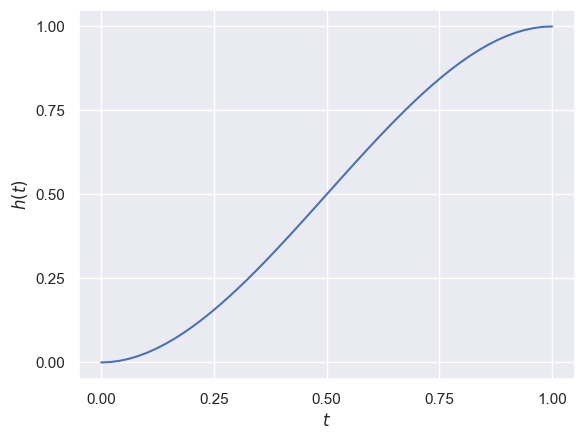

In [5]:
fig, ax = plt.subplots()

t_ = np.linspace(0, 1)

ax.plot(t_, h(t_));

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.set_xlabel("$t$");

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.set_ylabel("$h(t)$");

We can also use [SymPy](https://www.sympy.org/en/index.html) to verify this function satisfies our five constraints.

In [6]:
# function constraints
assert h(0) == 0
assert h(1) == 1

In [7]:
dh = lambdify(t, h(t).diff(t))

# derivative constraints
assert dh(0) == 0
assert dh(1) == 0

In [8]:
d2h = lambdify(t, h(t).diff(t).diff(t))

# second derivative constraint
assert d2h(0.5) == 0

Thankfully, we have done the math correctly and $h$ satisfies all of our constraints.

## Kayaker's heuristics

While the plot of water height above is plausible and the function satisfies our constraints, kayakers use a number of heuristics to predict the water height and flow rate based on the time since the most recent slack tide.  In the rest of this post we will compare the predictions of our function $h$ with these heuristics.

For these heuristics we will use [Kayarchy](https://www.kayarchy.com/), my favorite online resource for sea kayaking information, as our reference.  Note that in this section we assume there are six hours between low tide at time $t = 0$ and the subsequent high tide at time $t = 1$ for simplicity.  In reality, due to the fact that the moon takes slightly more than one day to orbit the earth completely, these tides are about [six hours and twelve minutes apart](https://en.wikipedia.org/wiki/Tide#Example_calculation:~:text=the%20time%20between%20semi%2Ddiurnal%20tides%20is%20not%20twelve%20but%2012.4206%20hours), on average.  Since six is much easer to do mental math with than 6.2 while paddling a kayak in wind and waves, the following heuristics all make this simplifying assumption.

### Rule of Twelfths

The [Rule of Twelfths](https://www.kayarchy.com/html/03thesea/005tides.htm#ruleoftwelfths) sates

> In the first hour after low tide, the water level rises by 1/12 of the tidal range. In the second hour, it rises by 2/12. In the third hour it rises by 3/12. In the fourth hour it is 3/12 again, then 2/12, then 1/12 in the last hour before high tide.

We define these hourly increments in a NumPy array.

In [9]:
TWELFTHS_HEIGHT_INC = np.array([1, 2, 3, 3, 2, 1]) / 12

With this array, we can compare the tide height predicted by the Rule of Twelfths to the predictions of $h$ at each hour after high tide.

In [10]:
HOURS = np.linspace(0, 1, 7)

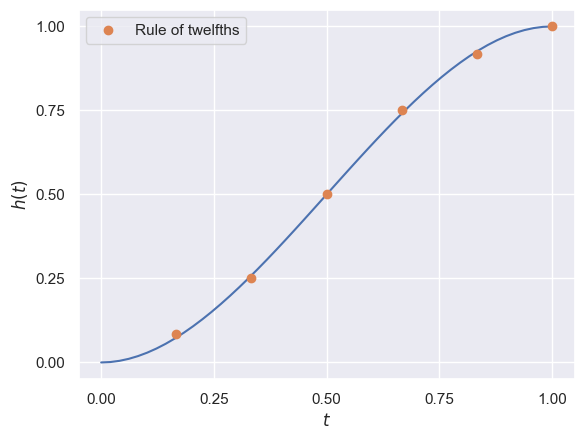

In [11]:
fig, ax = plt.subplots()

ax.plot(t_, h(t_));

ax.scatter(HOURS[1:], TWELFTHS_HEIGHT_INC.cumsum(),
           c="C1", zorder=5, label="Rule of twelfths");

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.set_xlabel("$t$");

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.set_ylabel("$h(t)$");

ax.legend();

We see that $h$ and the Rule of Twelfths are in fairly close agreement.

### Rule of Thirds

We now turn from predicting tide height with the rule of twelfths to three heuristics for predicting tidal flow rates.  The [Rule of Thirds](https://www.kayarchy.com/html/03thesea/006currents.htm#:~:text=At%20slack%20water%2C%20there,water%2C%20so%200/3.) states that

> At slack water, there may be a few confused currents but the overall mass of water is stationary. The Rule of Thirds describes the flow at this time as 0/3. An hour later the rate of flow is 1/3 of the maximum printed on the chart. At two hours it is 2/3, at three it is 3/3, at four it is 2/3, at five it is 1/3 again, and after six it is slack water, so 0/3.

We define the expected flow rates from the Rule of Thirds below.

In [12]:
THIRDS_FLOW_RATE = np.array([0, 1, 2, 3, 2, 1, 0]) / 3

Note that the rule of thirds expresses the flow rate at each hour as a fraction of the maximum flow rate, which, according to our second derivative assumption, occurs at $t = \tfrac{1}{2}$.

In [13]:
MAX_FLOW = dh(0.5)

We now compare the flow rate predictions from the Rule of Thirds to those from $h'$.

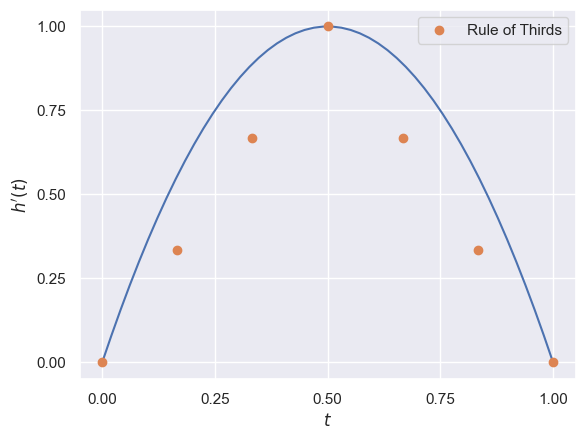

In [14]:
fig, ax = plt.subplots()

t_ = np.linspace(0, 1)

ax.plot(t_, dh(t_) / MAX_FLOW);

ax.scatter(HOURS, THIRDS_FLOW_RATE,
           c="C1", zorder=5, label="Rule of Thirds");

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.set_xlabel("$t$");

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.set_ylabel("$h'(t)$");

ax.legend();

We see that where it matters most, at one, two, four, and five hours after low tide, the predictions of the Rule of Thirds are directionally correct, but not particularly close to the predictions of $h'$.  It remains to be seen if this is a deficiency of either the Rule of Thirds or of $h$.

### The 50/90 Rule

Per [Kayarchy](https://www.kayarchy.com/html/03thesea/006currents.htm#:~:text=Alternatively%20there%20is,six%20hours%200%25.),

> Alternatively there is the 50/90 Rule which is often more accurate but perhaps not quite so easy to use in high wind and waves. It states that an hour after slack water the rate of flow is 50% of the maximum, at two hours it is 90%, at three hours 100%, at four hours 90% again, at 5 hours 50% and at six hours 0%.

Kayarchy raises an interesting point here, if it is indeed the rule of thirds that could stand to be improved, that improvement is likely to come with the tradeoff of higher complexity.

We define the expected flow rates for the 50/90 Rule below.

In [15]:
FLOW_RATE_50_90 = np.array([0, 0.5, 0.9, 1, 0.9, 0.5, 0])

We now compare the Rule of Thirds, the 50/90 Rule, and $h'$.

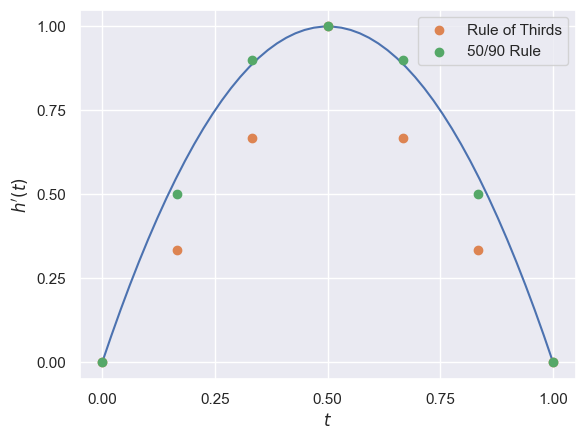

In [16]:
fig, ax = plt.subplots()

t_ = np.linspace(0, 1)

ax.plot(t_, dh(t_) / MAX_FLOW);

ax.scatter(HOURS, THIRDS_FLOW_RATE,
           c="C1", zorder=5, label="Rule of Thirds");

ax.scatter(HOURS, FLOW_RATE_50_90,
           c="C2", zorder=5, label="50/90 Rule");

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.set_xlabel("$t$");

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.set_ylabel("$h'(t)$");

ax.legend();

We see that the 50/90 Rule agrees much more closely with $h'$ than the Rule of Thirds, suggesting that it was indeed the Rule of Thirds that was in need of improvement.

### Règle des Sixièmes

One final rule, popular in France, is the [Règle des Sixièmes](https://www.kayarchy.com/html/03thesea/006currents.htm#:~:text=(slack%20water%20%2D%20zero%20flow.%20First%20hour%20after%2C%203/6%20flow.%20In%20the%20second%20hour%20after%2C%205/6%20flow%2C%20in%20the%20third%20hour%2C%206/6%20flow%2C%20then%205/6%2C%20then%203/6).)

> \[S\]lack water - zero flow. First hour after, 3/6 flow. In the second hour after, 5/6 flow, in the third hour, 6/6 flow, then 5/6, then 3/6.

We define the expected flow rates for the Règle des Sixièmes below.

In [17]:
SIXIEMES_FLOW_RATE = np.array([0, 3, 5, 6, 5, 3, 0]) / 6

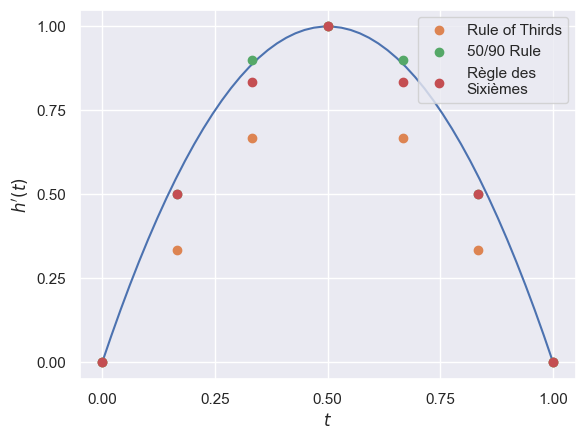

In [18]:
fig, ax = plt.subplots()

t_ = np.linspace(0, 1)

ax.plot(t_, dh(t_) / MAX_FLOW);

ax.scatter(HOURS, THIRDS_FLOW_RATE,
           c="C1", zorder=5, label="Rule of Thirds");

ax.scatter(HOURS, FLOW_RATE_50_90,
           c="C2", zorder=5, label="50/90 Rule");

ax.scatter(HOURS, SIXIEMES_FLOW_RATE,
           c="C3", zorder=5, label="Règle des\nSixièmes");

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.set_xlabel("$t$");

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.set_ylabel("$h'(t)$");

ax.legend(loc="upper right");

We see that the Règle des Sixièmes is slightly further from $h'$ than the 50/90 Rule two and four hours after high tide, but is still much closer than the Rule of Thirds.

I find it quite rewarding that the simple polynomial function, $h$, that we derived from five physics-based constraints agrees reasonably well with time-tested kayker's heuristics.  Certainly this agreement is enough validation for me to use $h$ to model tidal water levels for my digital tide clock.

This post is available as a Jupyter notebook [here](https://nbviewer.org/gist/AustinRochford/c52b0104a842eb3232c237a89bd1671a).

In [19]:
%load_ext watermark
%watermark -n -u -v -iv -p sympy

Last updated: Sat Nov 16 2024

Python implementation: CPython
Python version       : 3.10.10
IPython version      : 8.11.0

sympy: 1.12

seaborn   : 0.12.2
matplotlib: 3.7.1
numpy     : 1.24.2

